#Import necessary libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.shape

(25, 2)

#Data Visualization



> plotting 2-D scatter plot between No of hours and Scores to find out the relation between variable.



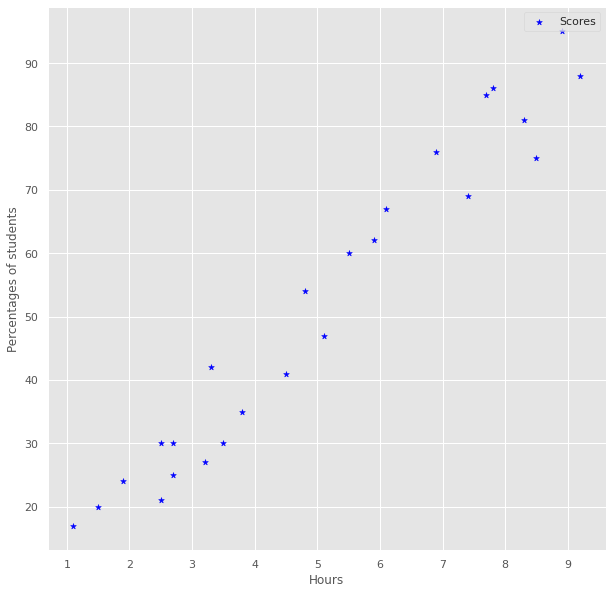

In [25]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
plt.scatter(data['Hours'] , data['Scores'] ,label='Scores' , marker='*' , color={'blue'})
plt.xlabel("Hours")
plt.ylabel("Percentages of students")
plt.legend()
plt.show()

#Preparing the data

In [52]:
x = data.iloc[: ,:-1].values
y = data.iloc[: ,1].values


Spliting main data set into training and test data set

In [53]:
from sklearn.model_selection import train_test_split

train_x , test_x , train_y , test_y = train_test_split(x, y , test_size=0.25 , random_state=52)

#Training the linear regression model on the train dataset

In [54]:
from sklearn.linear_model import LinearRegression
Lreg = LinearRegression()
Lreg.fit(train_x , train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plotting the regression line

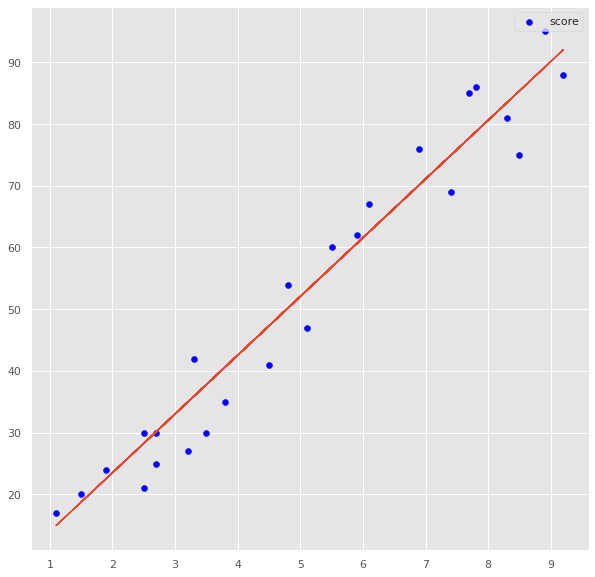

In [61]:
plt.figure(figsize=(10,10))
line = x*Lreg.coef_ + Lreg.intercept_
plt.scatter(data['Hours'] , data['Scores'] ,color={'blue'} , label='score')
plt.plot(data['Hours'] , line)
plt.legend()
plt.show()

#Making Predictions

In [62]:
test_predict = Lreg.predict(test_x)

#Comparing the predicted and actual values

In [64]:
Compare_data = pd.DataFrame({"Actual values":test_y ,"Predicted values":test_predict })
Compare_data.head(10)

,Actual values,Predicted values
0,60,56.825263
1,25,30.181053
2,67,62.534737
3,17,14.955789
4,30,37.793684
5,41,47.309474
6,27,34.938947


#Evaluation matrix

Here , we are using Root mean squared log error as a evaluation matrix

In [66]:
from sklearn.metrics import  mean_squared_log_error as msle

In [67]:
score = np.sqrt(msle(test_y , test_predict))

In [69]:
print("Root mean squared log error: " ,score)

Root mean squared log error:  0.16353957974041217


#Checking the model on manually given input 

In [73]:
hours = 9.25
predicted_perc = Lreg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted_perc[0]))

No of Hours = 9.25
Predicted Score = 92.50947368421052
